<a href="https://colab.research.google.com/github/Bahaakhalled/Egypt-Cairo-Housing/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [518]:
import pandas as pd
import numpy as np
from pathlib import Path

In [519]:
my_file = Path("properties.csv")
if my_file.is_file()==False:
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Egypt-Cairo-Housing/main/properties.csv'

In [520]:
prop=pd.read_csv('properties.csv')
prop.head()

,type,title,location,bedroom,bathroom,size_sqm,price
0,Duplex,Prime Location Duplex Fully Finished With A\C,"Park View, North Investors Area, New Cairo City, Cairo",4,4,345,"6,850,000"
1,Villa,Town house resale at Mivida Emaar with best price,"Mivida, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo",3,3,285,"10,000,000"
2,Apartment,Lake View Residence - Apartment | Prime Location,"Lake View Residence, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo",3,3,210,"5,700,000"
3,Townhouse,Best Penthouse for sale in villette ( sky conds ),"La Vista City, New Capital Compounds, New Capital City, Cairo",4,4,230,"7,510,000"
4,Penthouse,2nd Floor | Fully Finished | Lowest Price |Parking,"Villette, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo",5,6,284,"8,511,300"


In [521]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11418 entries, 0 to 11417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      11418 non-null  object
 1   title     11418 non-null  object
 2   location  11418 non-null  object
 3   bedroom   11418 non-null  object
 4   bathroom  11418 non-null  int64 
 5   size_sqm  11418 non-null  object
 6   price     11418 non-null  object
dtypes: int64(1), object(6)
memory usage: 624.5+ KB


In [522]:
prop.nunique()

type          10
title       9941
location     803
bedroom       10
bathroom       8
size_sqm     718
price       2497
dtype: int64

In [523]:
import seaborn as sns
import string,re

In [524]:
cprop=prop.copy()

In [525]:
cprop.price.value_counts()

Ask           412
2,500,000     174
3,000,000     168
3,500,000     154
4,000,000     131
             ... 
18,500,001      1
1,247,000       1
6,558,000       1
2,372,031       1
4,554,066       1
Name: price, Length: 2497, dtype: int64

In [526]:
testingrows=cprop.loc[cprop.price=='Ask']
cprop=cprop.drop(cprop.loc[cprop.price=='Ask'].index,axis=0)
cprop

,type,title,location,bedroom,bathroom,size_sqm,price
0,Duplex,Prime Location Duplex Fully Finished With A\C,"Park View, North Investors Area, New Cairo City, Cairo",4,4,345,"6,850,000"
1,Villa,Town house resale at Mivida Emaar with best price,"Mivida, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo",3,3,285,"10,000,000"
2,Apartment,Lake View Residence - Apartment | Prime Location,"Lake View Residence, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo",3,3,210,"5,700,000"
3,Townhouse,Best Penthouse for sale in villette ( sky conds ),"La Vista City, New Capital Compounds, New Capital City, Cairo",4,4,230,"7,510,000"
4,Penthouse,2nd Floor | Fully Finished | Lowest Price |Parking,"Villette, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo",5,6,284,"8,511,300"
...,...,...,...,...,...,...,...
11413,Villa,فيلا تشطيب الترا سوبر لوكس بالتجمع علي شارع رئيسي,"Street70, District 2, The 5th Settlement, New Cairo City, Cairo",8,7,"1,500","30,000,000"
11414,Townhouse,town house for sale 220m Mountain View III,"Mountain View 3, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo",4,4,220,"10,276,891"
11415,Apartment,3 Bedrooms|Del 2026|5% Down|9 years install,"IL Bosco City, Mostakbal City Compounds, Mostakbal City - Future City, Cairo",3,3,177,"2,811,346"
11416,Penthouse,Very prime location penthouse 275m for sale,"Stone Residence, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo",5,4,275,"3,000,000"


In [527]:
cprop.title=cprop.title.apply(lambda m:m.lower())
cprop.location=cprop.location.apply(lambda m:m.lower())
cprop.type=cprop.type.apply(lambda m:m.lower())

cprop.price=cprop.price.apply(lambda m:m.replace(',',''))
cprop.price=cprop['price'].astype('int64')

In [528]:
cprop=cprop.drop(cprop.sort_values(by='price',ascending=False).head(1).index,axis=0)

In [529]:
cprop.bedroom.unique()

array(['4', '3', '5', '2', '1', '7', '6', '8', 'Studio', '{0}'],
      dtype=object)

In [530]:
cprop=cprop.drop(cprop.loc[cprop.bedroom=='{0}'].head(1).index,axis=0)

In [531]:
cprop.bedroom=cprop.bedroom.apply(lambda m:m.replace('Studio','1'))
cprop.type=cprop.type.apply(lambda m:m.replace('ivilla','villa'))
cprop.type=cprop.type.apply(lambda m:m.replace('compound','apartment'))
cprop.type=cprop.type.apply(lambda m:m.replace('hotel apartment','apartment'))
cprop.bedroom=cprop['bedroom'].astype('int64')
cprop.size_sqm=cprop.size_sqm.apply(lambda m:m.replace(',',''))
cprop.size_sqm=cprop['size_sqm'].astype('int64')
pattern = r'[' + string.punctuation + ']'
cprop['title']=cprop['title'].map(lambda m:re.sub(pattern," ",m))
cprop['location']=cprop['location'].map(lambda m:re.sub(pattern," ",m))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5ae723950>,
      dtype=object)

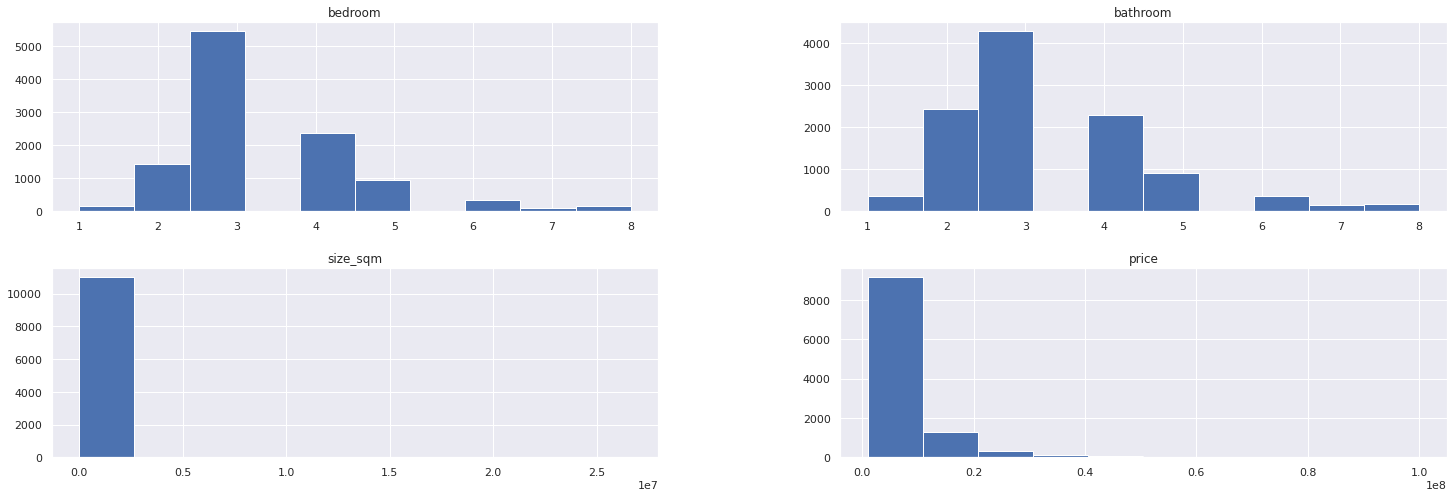

In [532]:
sns.set(rc={"figure.figsize":(25, 8)})
cprop.hist()

In [533]:
cityprop=cprop.copy()
cityprop['City']='NA'

cityprop.loc[cityprop['title'].str.contains("5th"),'City']='New Cairo'
cityprop.loc[cityprop['title'].str.contains("settlement"),'City']='New Cairo'
cityprop.loc[cityprop['title'].str.contains("new cairo"),'City']='New Cairo'
cityprop.loc[cityprop['title'].str.contains("tag sultan"),'City']='New Cairo'
cityprop.loc[cityprop['title'].str.contains("mivida"),'City']='New Cairo'
cityprop.loc[cityprop['location'].str.contains("5th"),'City']='New Cairo'
cityprop.loc[cityprop['location'].str.contains("settlement"),'City']='New Cairo'
cityprop.loc[cityprop['location'].str.contains("new cairo"),'City']='New Cairo'
cityprop.loc[cityprop['location'].str.contains("tag sultan"),'City']='New Cairo'


cityprop.loc[cityprop['title'].str.contains("new capital"),'City']='New Capital'
cityprop.loc[cityprop['location'].str.contains("new capital"),'City']='New Capital'
cityprop.loc[cityprop['title'].str.contains("capital"),'City']='New Capital'
cityprop.loc[cityprop['location'].str.contains("capital"),'City']='New Capital'

cityprop.loc[cityprop['title'].str.contains("mostakbal"),'City']='Mostakbal City'
cityprop.loc[cityprop['location'].str.contains("mostakbal"),'City']='Mostakbal City'

cityprop.loc[cityprop['title'].str.contains("shorouk"),'City']='Shorouk'
cityprop.loc[cityprop['title'].str.contains("madinaty"),'City']='Shorouk'
cityprop.loc[cityprop['location'].str.contains("shorouk"),'City']='Shorouk'
cityprop.loc[cityprop['location'].str.contains("madinaty"),'City']='Shorouk'
cityprop.loc[cityprop['title'].str.contains("eastown"),'City']='Shorouk'
cityprop.loc[cityprop['location'].str.contains("eastown"),'City']='Shorouk'


cityprop.loc[cityprop['title'].str.contains("heliopolis"),'City']='New Heliopolis'
cityprop.loc[cityprop['location'].str.contains("heliopolis"),'City']='New Heliopolis'


cityprop.loc[cityprop['location'].str.contains("uptown"),'City']='Cairo'
cityprop.loc[cityprop['title'].str.contains("zamalek"),'City']='Cairo'
cityprop.loc[cityprop['location'].str.contains("zamalek"),'City']='Cairo'
cityprop.loc[cityprop['title'].str.contains("mokattam"),'City']='Cairo'
cityprop.loc[cityprop['location'].str.contains("mokattam"),'City']='Cairo'
cityprop.loc[cityprop['title'].str.contains("maadi"),'City']='Cairo'
cityprop.loc[cityprop['location'].str.contains("maadi"),'City']='Cairo'
cityprop.loc[(cityprop['location'].str.contains("nasr")) | (cityprop['title'].str.contains("nasr")),'City']='Cairo'
cityprop.loc[cityprop.City=='NA','City']='Cairo'


In [534]:
cityprop.City.value_counts()

New Cairo         6697
Shorouk           1643
Cairo              932
New Capital        837
Mostakbal City     526
New Heliopolis     369
Name: City, dtype: int64

In [535]:
pd.set_option('display.max_colwidth', None)
cityprop.loc[(cityprop['location'].str.contains("nasr city")) & (cityprop.City=='NA')].head(50)

,type,title,location,bedroom,bathroom,size_sqm,price,City


In [536]:
cityprop.loc[(cityprop['title'].str.contains("apartment")) & (cityprop.type!='apartment'),'type']='apartment'
cityprop.loc[(cityprop['title'].str.contains("villa")) & (cityprop.type!='villa'),'type']='villa'
cityprop.loc[(cityprop['title'].str.contains("town")) & (cityprop.type!='townhouse'),'type']='townhouse'
cityprop.loc[(cityprop['title'].str.contains("twin")) & (cityprop.type!='twin house'),'type']='twin house'
cityprop.loc[(cityprop['title'].str.contains("duplex")) & (cityprop.type!='duplex'),'type']='duplex'
cityprop.loc[(cityprop['title'].str.contains("pent")) & (cityprop.type!='penthouse'),'type']='penthouse'
cityprop.loc[(cityprop['title'].str.contains("villa")) & (cityprop.type!='villa'),'type']='villa'
cityprop.loc[(cityprop['title'].str.contains("hotel")) & (cityprop.type!='apartment'),'type']='apartment'

In [537]:
cityprop.type.value_counts()

apartment     5170
villa         2931
townhouse     1212
twin house     671
penthouse      512
duplex         505
chalet           3
Name: type, dtype: int64

In [538]:
#cityprop.loc[(cityprop['title'].str.contains("chalet")) & (cityprop.type!='chalet')]
cityprop=cityprop.drop(cityprop.loc[cityprop.type=='chalet'].index,axis=0)

In [539]:
cityprop.type.value_counts()

apartment     5170
villa         2931
townhouse     1212
twin house     671
penthouse      512
duplex         505
Name: type, dtype: int64

In [540]:
prop_with_ol=cityprop.copy()

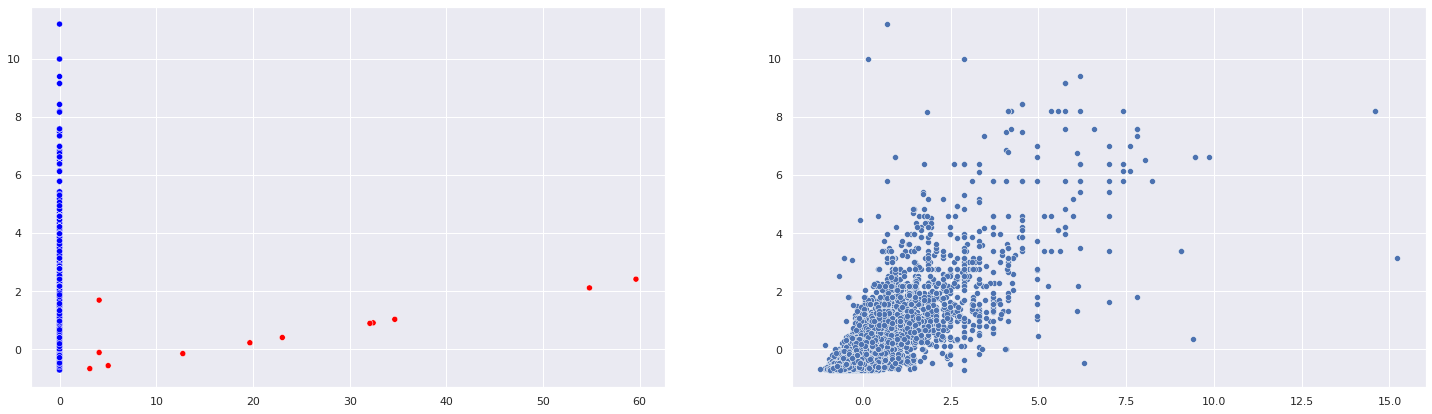

In [541]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

plot , ax = plt.subplots(1 , 2 , figsize = (25 , 7))

outliers = (preprocessing.scale(cityprop["size_sqm"]) >3)
sns.scatterplot(data=cityprop,x=preprocessing.scale(cityprop['size_sqm']),y=preprocessing.scale(cityprop['price']),c = ["red" if is_outlier  else "blue" for is_outlier  in outliers],ax=ax[0])

cityprop.drop(cityprop[outliers].index , inplace = True)
sns.scatterplot(data = cityprop ,x = preprocessing.scale(cityprop['size_sqm']), y = preprocessing.scale(cityprop['price']),ax=ax[1])

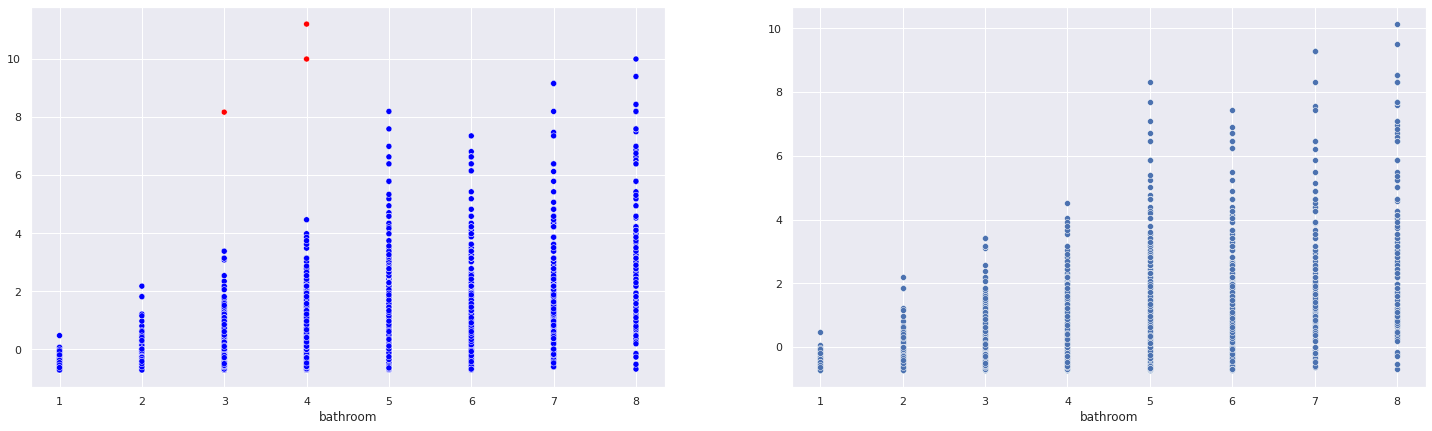

In [542]:
sns.set(rc={"figure.figsize":(25, 8)})

plot , ax = plt.subplots(1 , 2 , figsize = (25 , 7))
outliers = (((cityprop["bathroom"]==3) | (cityprop["bathroom"]==4)) & (preprocessing.scale(cityprop["price"])>8))
sns.scatterplot(data=cityprop,x=cityprop['bathroom'],y=preprocessing.scale(cityprop['price']),c = ["red" if is_outlier  else "blue" for is_outlier  in outliers],ax=ax[0])

cityprop.drop(cityprop[outliers].index , inplace = True)
sns.scatterplot(data = cityprop ,x = cityprop['bathroom'], y = preprocessing.scale(cityprop['price']),ax=ax[1])

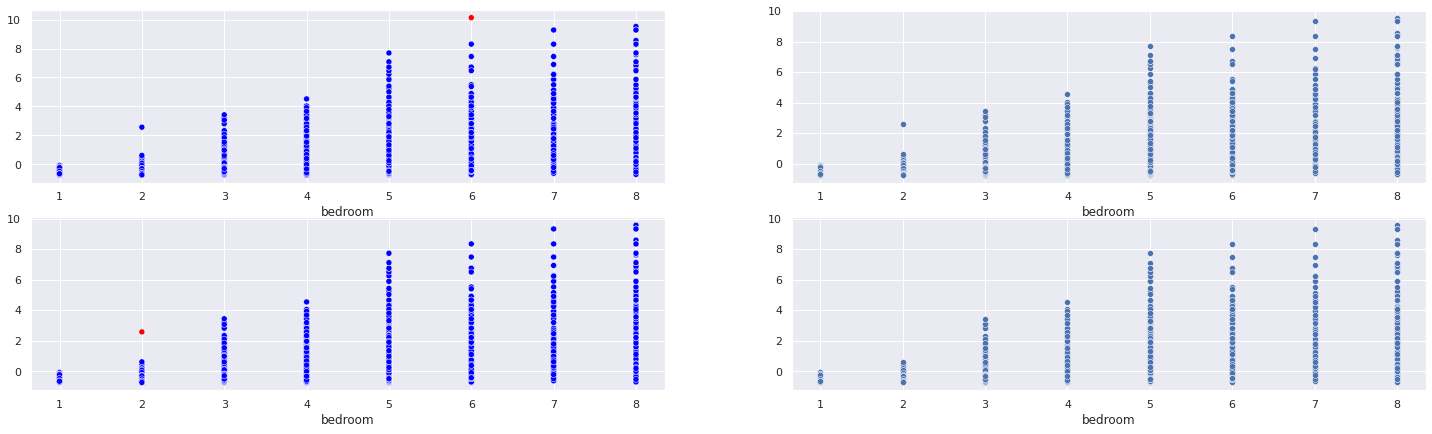

In [543]:
outliers = ((cityprop["bedroom"]==6) & (preprocessing.scale(cityprop["price"])>9))

plot , ax = plt.subplots(2 , 2 , figsize = (25 , 7))

sns.scatterplot(data=cityprop,x=cityprop['bedroom'],y=preprocessing.scale(cityprop['price']),c = ["red" if is_outlier  else "blue" for is_outlier  in outliers],ax=ax[0,0])

cityprop.drop(cityprop[outliers].index , inplace = True)
sns.scatterplot(data = cityprop ,x = cityprop['bedroom'], y = preprocessing.scale(cityprop['price']),ax=ax[0,1])

outliers1 = ((cityprop["bedroom"]==2) & (preprocessing.scale(cityprop["price"])>2))
sns.scatterplot(data=cityprop,x=cityprop['bedroom'],y=preprocessing.scale(cityprop['price']),c = ["red" if is_outlier  else "blue" for is_outlier  in outliers1],ax=ax[1,0])

cityprop.drop(cityprop[outliers1].index , inplace = True)
sns.scatterplot(data = cityprop ,x = cityprop['bedroom'], y = preprocessing.scale(cityprop['price']),ax=ax[1,1])

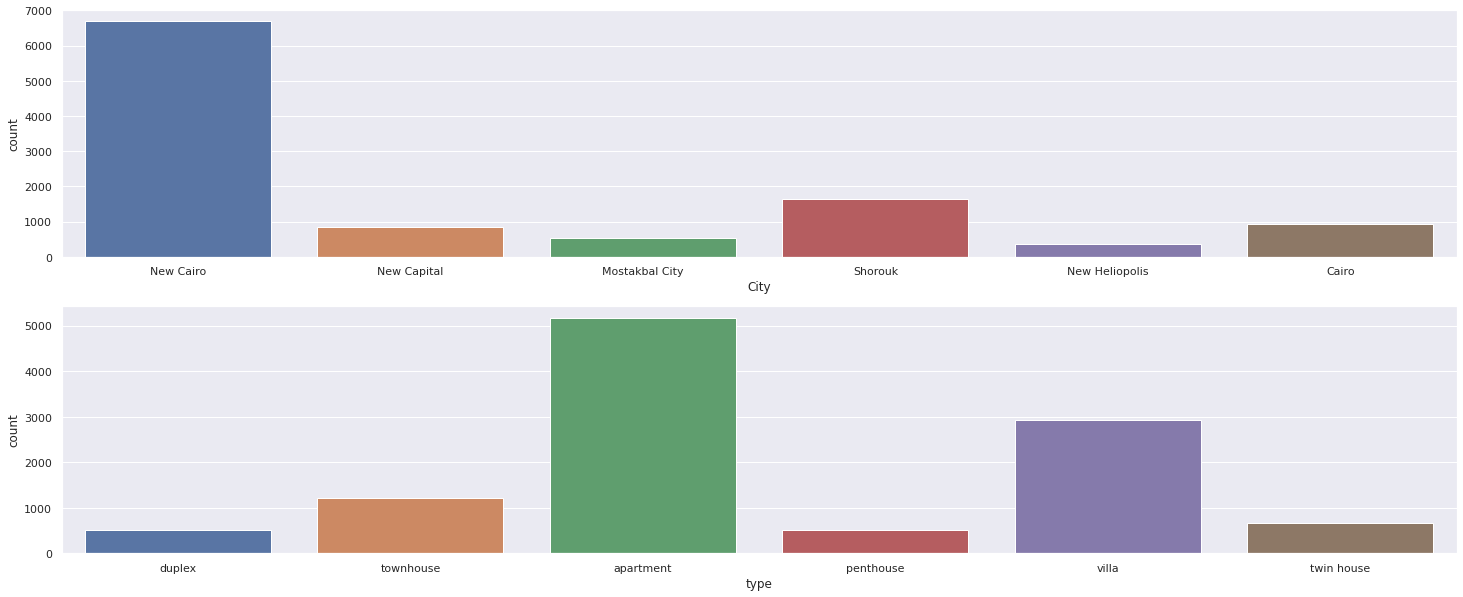

In [544]:
plot , ax = plt.subplots(2 , 1 , figsize = (25 , 10))
sns.countplot(x=cityprop["City"],ax=ax[0])
sns.countplot(x=cityprop["type"],ax=ax[1])

In [545]:
cityprop

,type,title,location,bedroom,bathroom,size_sqm,price,City
0,duplex,prime location duplex fully finished with a\c,park view north investors area new cairo city cairo,4,4,345,6850000,New Cairo
1,townhouse,town house resale at mivida emaar with best price,mivida 5th settlement compounds the 5th settlement new cairo city cairo,3,3,285,10000000,New Cairo
2,apartment,lake view residence apartment prime location,lake view residence 5th settlement compounds the 5th settlement new cairo city cairo,3,3,210,5700000,New Cairo
3,penthouse,best penthouse for sale in villette sky conds,la vista city new capital compounds new capital city cairo,4,4,230,7510000,New Capital
4,penthouse,2nd floor fully finished lowest price parking,villette 5th settlement compounds the 5th settlement new cairo city cairo,5,6,284,8511300,New Cairo
...,...,...,...,...,...,...,...,...
11413,villa,فيلا تشطيب الترا سوبر لوكس بالتجمع علي شارع رئيسي,street70 district 2 the 5th settlement new cairo city cairo,8,7,1500,30000000,New Cairo
11414,townhouse,town house for sale 220m mountain view iii,mountain view 3 5th settlement compounds the 5th settlement new cairo city cairo,4,4,220,10276891,New Cairo
11415,apartment,3 bedrooms del 2026 5 down 9 years install,il bosco city mostakbal city compounds mostakbal city future city cairo,3,3,177,2811346,Mostakbal City
11416,penthouse,very prime location penthouse 275m for sale,stone residence 5th settlement compounds the 5th settlement new cairo city cairo,5,4,275,3000000,New Cairo


In [546]:
cityprop['Compound']=0
prop_with_ol['Compound']=0

In [547]:
cityprop.loc[(cityprop['location'].str.contains("compound")) | (cityprop['title'].str.contains("compound")),'Compound']=1
cityprop.loc[(cityprop['location'].str.contains("كمبوند")) | (cityprop['title'].str.contains("كمبوند")),'Compound']=1

prop_with_ol.loc[(prop_with_ol['location'].str.contains("compound")) | (prop_with_ol['title'].str.contains("compound")),'Compound']=1
prop_with_ol.loc[(prop_with_ol['location'].str.contains("كمبوند")) | (prop_with_ol['title'].str.contains("كمبوند")),'Compound']=1

In [548]:
cpd_names=pd.read_excel('compoundlist.xlsx',header=None,names=['Compound_Names'])
cpd_names.head()

,Compound_Names
0,Mivida: apartments and villas in New Cairo developed by Emaar
1,Business Plus: administrative units in New Cairo developed by HDG
2,90 Avenue: apartments in Maadi developed by Tabarak
3,The V: administrative units in New Capital developed by SAK Development
4,Cleo East: apartments with garden in New Cairo developed by Cleopatra Group


In [549]:
cpd_names.Compound_Names=cpd_names.Compound_Names.map(lambda m:m.split(':',1)[0])
cpd_names.Compound_Names=cpd_names.Compound_Names.map(lambda m:m.lower())

In [550]:
s1 = pd.Series(['rehab','tag sultan','gardenia','east town','mountain','madinaty','eastown','park','villette','layan','hyde park','beit al watan','golden square','village gate','fifth square','village gate','katameya heights','swan','dyar','katameya gardens','narges','al banafsag','emar','azzar','sodic'])
cpd_names=cpd_names.Compound_Names.append(s1, ignore_index=True)
cpd_names.shape

(189,)

In [551]:
cityprop.loc[cityprop['title'].apply(lambda x: any([i in x for i in cpd_names])),'Compound']=1
cityprop.loc[cityprop['location'].apply(lambda x: any([i in x for i in cpd_names])),'Compound']=1

prop_with_ol.loc[prop_with_ol['title'].apply(lambda x: any([i in x for i in cpd_names])),'Compound']=1
prop_with_ol.loc[prop_with_ol['location'].apply(lambda x: any([i in x for i in cpd_names])),'Compound']=1

In [552]:
cityprop.loc[(cityprop['title'].str.contains(" in ")) & (cityprop['Compound']==0)].title.map(lambda m:m.split(' in ',1)[1])

29                              new capital
42                                      cfc
61              new andalus   185m    dp25 
73                  near the police academy
112                  concorde elsalam hotel
                        ...                
10004                     manial nile view 
10008                       el shorouk city
10012                         neighborhoods
10257    stei8ht prime location 10  over 8y
10406                            lake view 
Name: title, Length: 391, dtype: object

In [553]:
cityprop.loc[(cityprop['Compound']==0)]

,type,title,location,bedroom,bathroom,size_sqm,price,City,Compound
29,penthouse,penthouse with installment 9 years in new capital,ismailia square el ismailia square heliopolis masr el gedida cairo,3,3,235,3300000,New Heliopolis,0
42,apartment,hot deal apartment view club house 3 bed in cfc,cairo festival city north investors area new cairo city cairo,3,3,204,5250000,New Cairo,0
57,apartment,apartment 150m modern with 14 years installments,el banafseg apartment buildings el banafseg new cairo city cairo,4,3,305,3150000,New Cairo,0
59,apartment,5 dp 10yrs installments 3br apartment finished,cornish el nile st maadi hay el maadi cairo,3,3,166,1950000,Cairo,0
61,apartment,book your unit in new andalus 185m dp25,al andalus el gedida al andalus district new cairo city cairo,3,2,185,1480000,New Cairo,0
...,...,...,...,...,...,...,...,...,...
11402,apartment,شقه 200 م متفرع من الحريه تطل فيو نادي الماظه س ل,almazah heliopolis masr el gedida cairo,3,2,200,1900000,New Heliopolis,0
11404,apartment,للبيع شقة ٥غرف بشارع القصر العيني امام جاردن سيتي,el sayeda zainab cairo,5,2,235,3400000,Cairo,0
11405,apartment,للبيع شقة ٥غرف بشارع قصر النيل,downtown cairo,5,2,180,2800000,Cairo,0
11406,apartment,شقة للبيع بشارع عبدالخالق ثروت,downtown cairo,6,2,260,3500000,Cairo,0


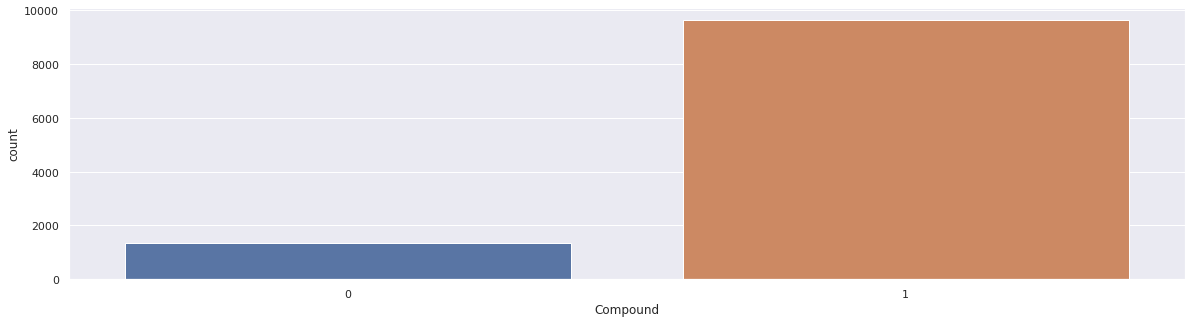

In [554]:
sns.set(rc={"figure.figsize":(20, 5)})
sns.countplot(x=cityprop["Compound"])

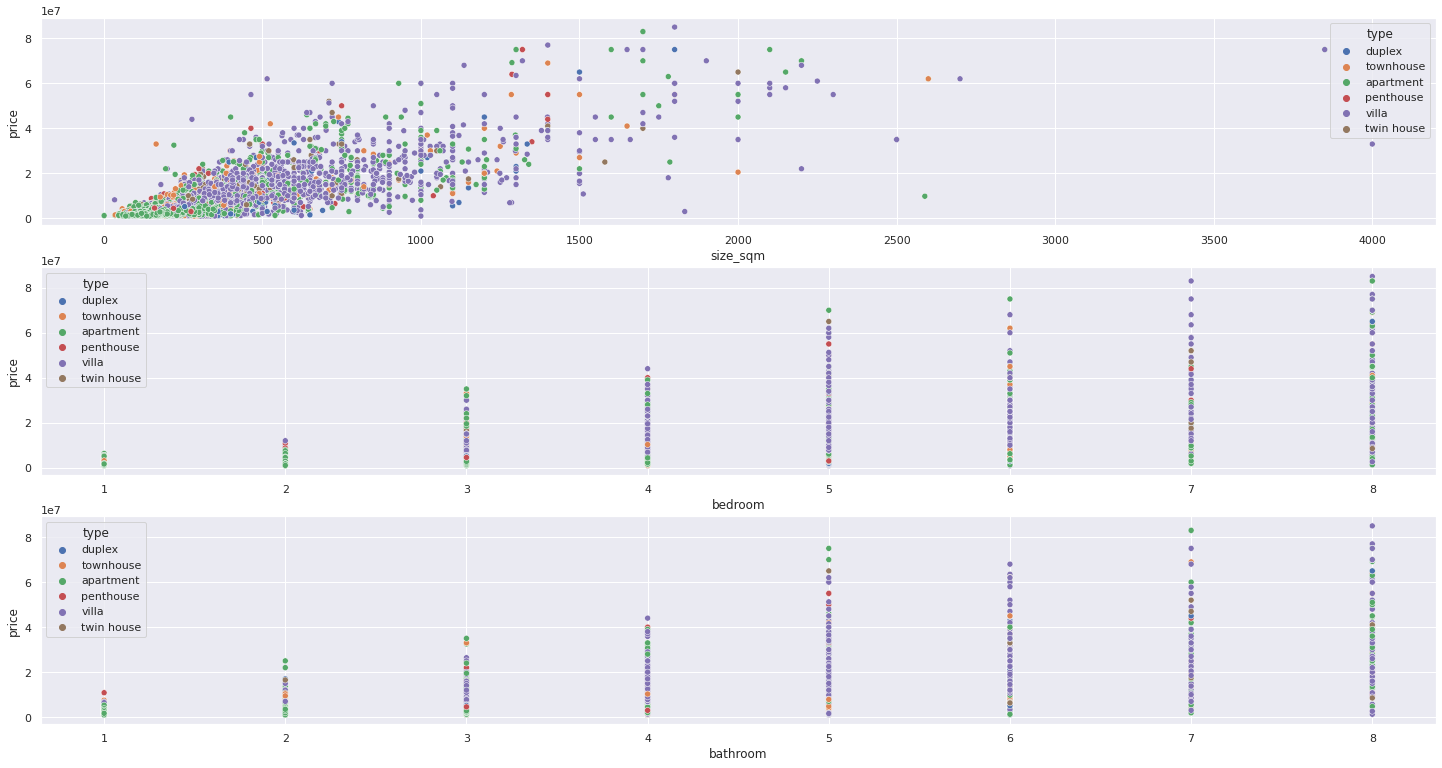

In [555]:
plot , ax = plt.subplots(3 , 1 , figsize = (25 , 13))
sns.scatterplot(data=cityprop, x="size_sqm", y="price", hue="type",ax=ax[0])
sns.scatterplot(data=cityprop, x="bedroom", y="price", hue="type",ax=ax[1])
sns.scatterplot(data=cityprop, x="bathroom", y="price", hue="type",ax=ax[2])

In [556]:
finalprop=cityprop.copy()
finalprop=finalprop.drop(['title','location'],axis=1)
X=finalprop.loc[:, finalprop.columns != 'price']
y=finalprop['price']

In [557]:
prop_with_ol=prop_with_ol.drop(['title','location'],axis=1)
X_with_ol=prop_with_ol.loc[:, prop_with_ol.columns != 'price']
y_with_ol=prop_with_ol['price']

In [558]:
from sklearn.preprocessing import MinMaxScaler

X_dummied=pd.get_dummies(X)
X_with_ol_dm=pd.get_dummies(X_with_ol)

scaler=MinMaxScaler()

df_scaled = scaler.fit_transform(X_dummied.to_numpy())

X_sc_dm = pd.DataFrame(df_scaled, columns=X_dummied.columns)

X_with_ol_scaled = scaler.fit_transform(X_with_ol_dm.to_numpy())
X_with_ol_dm_sc=pd.DataFrame(X_with_ol_scaled, columns=X_with_ol_dm.columns)

prop_dm=X_dummied.copy()
prop_dm['price']=y

prop_sc_dm=X_sc_dm.copy()
prop_sc_dm['price']=y

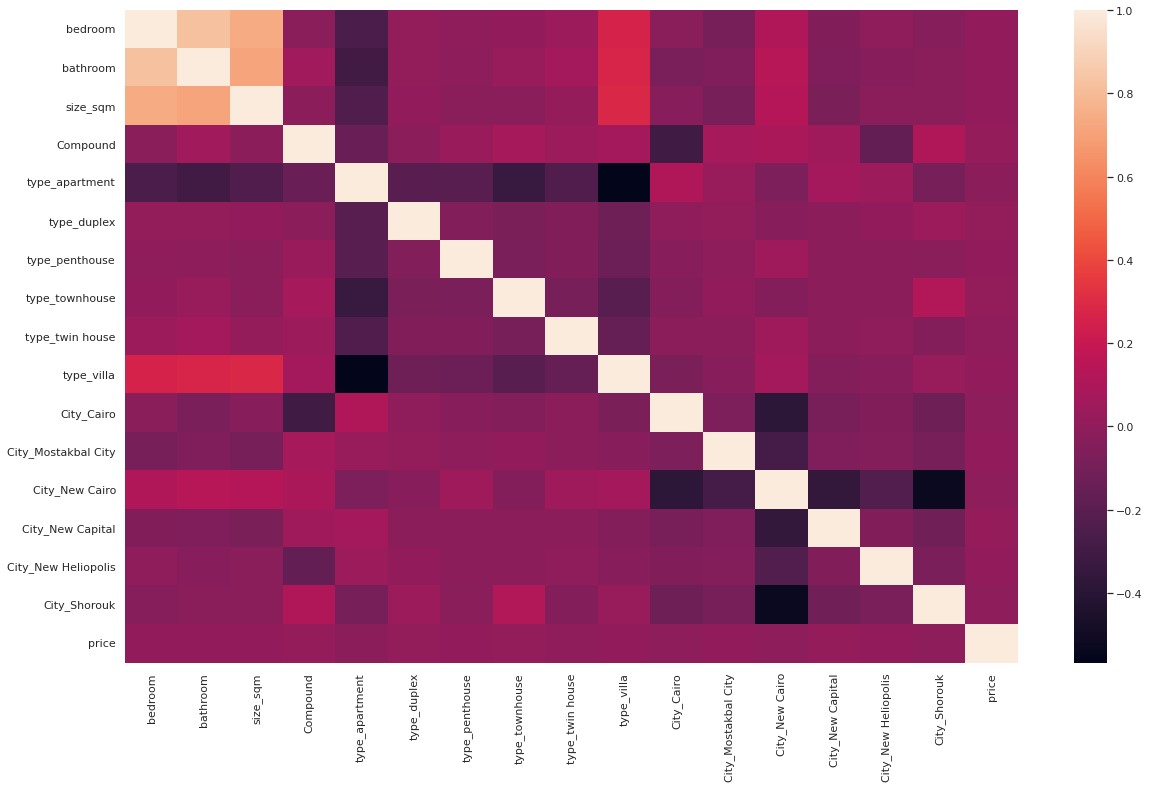

In [559]:
sns.set(rc={"figure.figsize":(20, 12)})
sns.heatmap(prop_sc_dm.corr())

In [560]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
import decimal
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

def predictmodels(clf_A,clf_B,clf_C,X,y,name):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

  results = {}
  df = pd.DataFrame()
  for clf in [clf_A, clf_B, clf_C]:
      clf_name = clf.__class__.__name__
      results[clf_name] = {}
      results[clf_name] = \
      clf = clf.fit(X_train, y_train)
      try:
        predictions_test = clf.predict(X_test)
      except:
        predictions_test = clf_A.predict(X_test)
      row={name:decimal.Decimal(r2_score(y_test,predictions_test))}
      rows=[decimal.Decimal(r2_score(y_test,predictions_test))] 
      d = {clf_name: row}
      if df.empty:
        df=pd.DataFrame(data=d)
      else:
        df[clf_name]=rows
  return df

Scaled and Dummied/Removed Outliers

Using the R2 score Linear models performed an almost identical 0.669 using Linear,Lasso and Polynomial

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.624e+16, tolerance: 5.852e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.624e+16, tolerance: 5.852e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[15:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:27:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


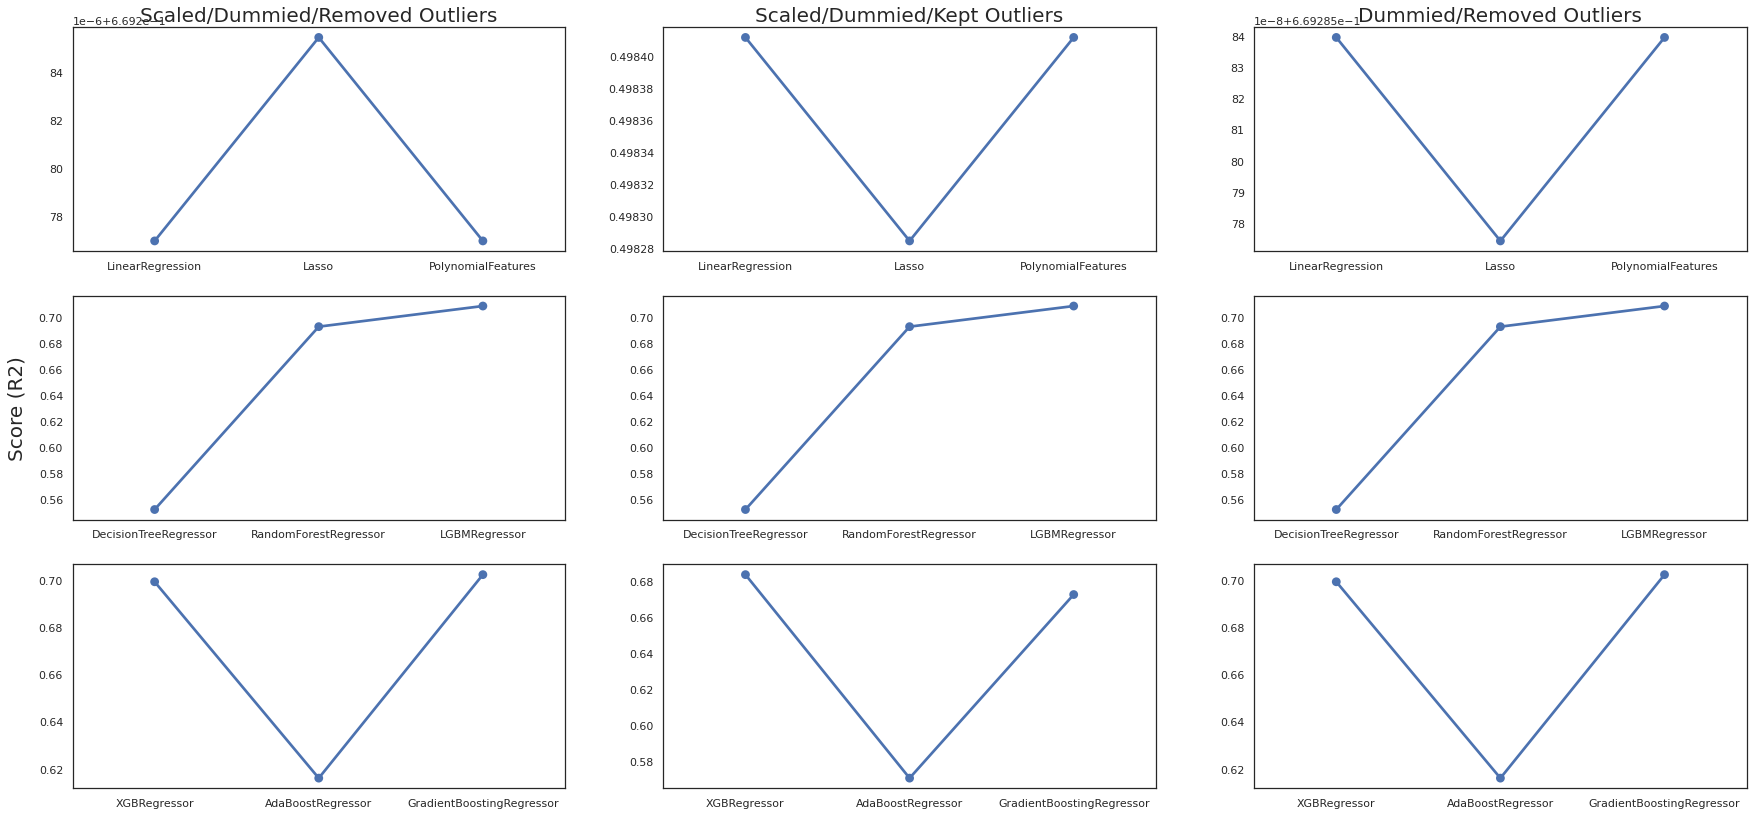

In [561]:
df=predictmodels(LinearRegression(),linear_model.Lasso(random_state=3),PolynomialFeatures(),X_sc_dm,y,'Scaled/Dummied/Removed Outliers')
df=df.transpose()
all=df
sns.set_style("white")
df=predictmodels(LinearRegression(),linear_model.Lasso(random_state=3),PolynomialFeatures(),X_sc_dm,y,'Scaled/Dummied/Removed Outliers')

plot , ax = plt.subplots(3 , 3 , figsize = (30 , 14))
sns.pointplot(ax=ax[0,0],x=list(df.keys()), y=df.iloc[0].values, markers=['o'], linestyles=['-'])
ax[0,0].set_title('Scaled/Dummied/Removed Outliers', size=20)

#Scaled and Dummied/Kept Outliers

#Keeping outliers in Linear Models underperformed with a huge difference from a high 0.669 to a low score of 0.498

df1=predictmodels(LinearRegression(),linear_model.Lasso(random_state=3),PolynomialFeatures(),X_with_ol_dm_sc,y_with_ol,'Scaled/Dummied/Kept Outliers')
edf1=df1.transpose()
all[edf1.columns[0]]=edf1.iloc[:, 0]

sns.pointplot(ax=ax[0,1],x=list(df1.keys()), y=df1.iloc[0].values, markers=['o'], linestyles=['-'])
ax[0,1].set_title('Scaled/Dummied/Kept Outliers', size=20)

#Dummied Only/Removed Outliers

#Scaling did not perform any difference in Linear Models

df2=predictmodels(LinearRegression(),linear_model.Lasso(random_state=3),PolynomialFeatures(),X_dummied,y,'Dummied/Removed Outliers')
edf2=df2.transpose()
all[edf2.columns[0]]=edf2.iloc[:, 0]
sns.pointplot(ax=ax[0,2],x=list(df2.keys()), y=df2.iloc[0].values, markers=['o'], linestyles=['-'])
ax[0,2].set_title('Dummied/Removed Outliers', size=20)
#Scaled and Dummied Without Outliers

#using Ensemble Methods with scaling created a slight improvement using LGBM Regressor than that of Linear Models 0.708
df=predictmodels(DecisionTreeRegressor(random_state=3),RandomForestRegressor(random_state=3),LGBMRegressor(random_state=3),X_sc_dm,y,'Scaled/Dummied/Removed Outliers')
sns.pointplot(ax=ax[1,0],x=list(df.keys()), y=df.iloc[0].values, markers=['o'], linestyles=['-'])
ax[1,0].set_ylabel('Score (R2)', size=20, labelpad=12.5)

edf=df.transpose()
tempdf=edf
#Scaled and Dummied with Outliers

#Outliers again underperforming in Ensemble Methods by a huge detoriation according to R2 Score
df1=predictmodels(DecisionTreeRegressor(random_state=3),RandomForestRegressor(random_state=3),LGBMRegressor(random_state=3),X_with_ol_dm_sc,y_with_ol,'Scaled/Dummied/Kept Outliers')
sns.pointplot(ax=ax[1,1],x=list(df.keys()), y=df.iloc[0].values, markers=['o'], linestyles=['-'])
edf1=df1.transpose()
tempdf[edf1.columns[0]]=edf1.iloc[:, 0]
#Dummied Only without Outliers

#Scaling made no difference in all ensemble methods 

df2=predictmodels(DecisionTreeRegressor(random_state=3),RandomForestRegressor(random_state=3),LGBMRegressor(random_state=3),X_dummied,y,'Dummied/Removed Outliers')
edf2=df2.transpose()
tempdf[edf2.columns[0]]=edf2.iloc[:, 0]
sns.pointplot(ax=ax[1,2],x=list(df.keys()), y=df.iloc[0].values, markers=['o'], linestyles=['-'])
all=pd.concat([all, tempdf])

df=predictmodels(xgb.XGBRegressor(random_state=3),AdaBoostRegressor(random_state=3),GradientBoostingRegressor(random_state=3),X_sc_dm,y,'Scaled/Dummied/Removed Outliers')
#Scaled and dummied without outliers
#Continuing with ensemble methods made no better results but a vary close result from XGB and an even closer using GBR
edf=df.transpose()
tempdf=edf
sns.pointplot(ax=ax[2,0],x=list(df.keys()), y=df.iloc[0].values, markers=['o'], linestyles=['-'])


df1=predictmodels(xgb.XGBRegressor(random_state=3),AdaBoostRegressor(random_state=3),GradientBoostingRegressor(random_state=3),X_with_ol_dm_sc,y_with_ol,'Scaled/Dummied/Kept Outliers')
edf1=df1.transpose()
tempdf[edf1.columns[0]]=edf1.iloc[:, 0]
#Scaled and Dummied with Outliers
#Underperforming Outliers

sns.pointplot(ax=ax[2,1],x=list(df1.keys()), y=df1.iloc[0].values, markers=['o'], linestyles=['-'])

df2=predictmodels(xgb.XGBRegressor(random_state=3),AdaBoostRegressor(random_state=3),GradientBoostingRegressor(random_state=3),X_dummied,y,'Dummied/Removed Outliers')
edf2=df2.transpose()
tempdf[edf2.columns[0]]=edf2.iloc[:, 0]
sns.pointplot(ax=ax[2,2],x=list(df.keys()), y=df.iloc[0].values, markers=['o'], linestyles=['-'])


all=pd.concat([all, tempdf])

In [562]:
all=all.reset_index().rename(columns={'index':'Model'})

In [563]:
all.sort_values(by=['Scaled/Dummied/Removed Outliers','Scaled/Dummied/Kept Outliers','Dummied/Removed Outliers'],ascending=False)

,Model,Scaled/Dummied/Removed Outliers,Scaled/Dummied/Kept Outliers,Dummied/Removed Outliers
5,LGBMRegressor,0.70811313945227905009005553438328206539154052734375,0.6825966238262333174446894190623424947261810302734375,0.70811313945227905009005553438328206539154052734375
8,GradientBoostingRegressor,0.7021026715811273799516811777721159160137176513671875,0.672645062004159743906939183943904936313629150390625,0.70199190689448809354900049584102816879749298095703125
6,XGBRegressor,0.6990861407601596244631991794449277222156524658203125,0.68371303050524279143473904696293175220489501953125,0.6990861407601596244631991794449277222156524658203125
4,RandomForestRegressor,0.69233636171325130259646130070905201137065887451171875,0.6446059083035582393250706445542164146900177001953125,0.6926111088547222127687064130441285669803619384765625
1,Lasso,0.6692854393820069081044721315265633165836334228515625,0.49828461007447899522304624042590148746967315673828125,0.66928577413126166817392004304565489292144775390625
0,LinearRegression,0.669276965659976408318243557005189359188079833984375,0.498411625560902127318740895134396851062774658203125,0.66928583967302290869128000849741511046886444091796875
2,PolynomialFeatures,0.669276965659976408318243557005189359188079833984375,0.498411625560902127318740895134396851062774658203125,0.66928583967302290869128000849741511046886444091796875
7,AdaBoostRegressor,0.6160844626068293639065132083487696945667266845703125,0.5705824278827276163639226069790311157703399658203125,0.6160844626068293639065132083487696945667266845703125
3,DecisionTreeRegressor,0.5523625080108687246394083558698184788227081298828125,0.40609802814371820378624988734372891485691070556640625,0.55317959009512207568803887625108473002910614013671875


We see and obvious positive change in results in all models when outliers were removed

In [564]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def Gridsrch(clf):
  parameters={'n_estimators':[50,100,200,300,500,1000],'learning_rate':[0.01,0.05,0.1]}

  scorer=make_scorer(mean_squared_error)

  grid_layout=GridSearchCV(clf,parameters,scoring=scorer)

  grid_fit=grid_layout.fit(X_train,y_train)

  best_clf=grid_fit.best_estimator_

  #predict using plane and optimized model
  predictions=(clf.fit(X_train,y_train).predict(X_test))
  best_predictions=best_clf.predict(X_test)
  print(str(clf) +" before Optimization: " + str(mean_squared_error(y_test,predictions)))
  print(str(clf) +" after Optimization: " + str(mean_squared_error(y_test,best_predictions)))
  print(str(clf) +" after Optimization R2: " + str(r2_score(y_test,best_predictions)))
  print(grid_fit.best_params_)
  return grid_fit

In [565]:
X_train, X_test, y_train, y_test = train_test_split(X_sc_dm, y, test_size = 0.2, random_state = 0)
grid_fit=Gridsrch(LGBMRegressor(random_state=3))

LGBMRegressor(random_state=3) before Optimization: 19495192207710.207
LGBMRegressor(random_state=3) after Optimization: 38715803871649.53
LGBMRegressor(random_state=3) after Optimization R2: 0.4203373670146344
{'learning_rate': 0.01, 'n_estimators': 50}


In [566]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    _, ax = plt.subplots(1,1)

    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')


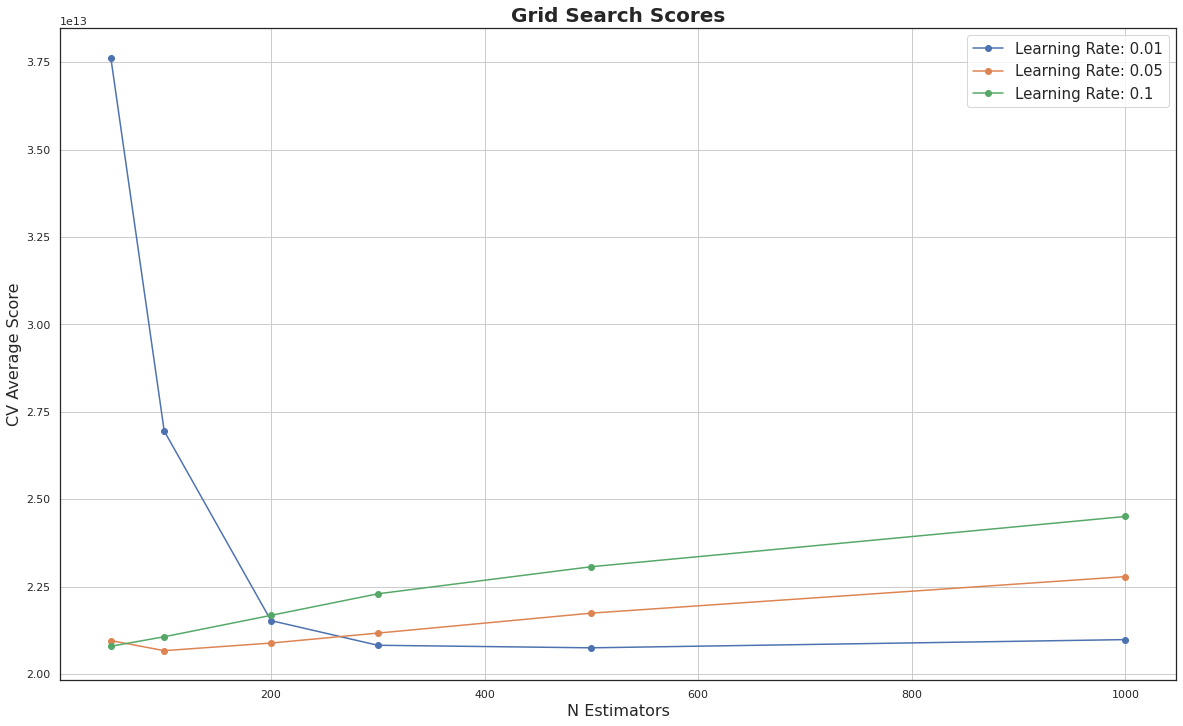

In [567]:
plot_grid_search(grid_fit.cv_results_, [50,100,200,300,500,1000], [0.01,0.05,0.1], 'N Estimators', 'Learning Rate')